**Tarea 5**

## **Ejercicio 1**

In [51]:
!pip install fiona


In [18]:
belgicaMap="https://github.com/betsfv/introgeodf/raw/refs/heads/main/maps/belgicaMaps_3447.gpkg"
linkWorldMap="https://github.com/betsfv/introgeodf/raw/refs/heads/main/maps/WorldMaps.gpkg"
import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['ciudades', 'paises', 'rios', 'indicators']

In [19]:
listlayers(belgicaMap)

['paises', 'ciudades', 'rios', 'aeropuertos', 'estados', 'municipalidades']

In [20]:
#Para los datos del WorldMap
paisesMundo=gpd.read_file(linkWorldMap,layer='paises') #Read from the local file
riosMundo=gpd.read_file(linkWorldMap,layer='rios') #Read from the local file
ciudadesMundo=gpd.read_file(linkWorldMap,layer='ciudades') #Read from the local file
indicadoresMundo=gpd.read_file(linkWorldMap,layer='indicators') #Read from the local file
#Para los datos de Belgica
riosBelgica=gpd.read_file(belgicaMap,layer='rios')
ciudadesBelgica=gpd.read_file(belgicaMap,layer='ciudades')
airportsBelgica=gpd.read_file(belgicaMap,layer='aeropuertos')
paisBelgica=gpd.read_file(belgicaMap,layer='paises')

# a) Traza tu país como fondo. Utilice cx para trazar las ciudades (u otros puntos, es decir, aeropuertos) debajo del centroide.

In [21]:
belgica=paisBelgica[paisBelgica.COUNTRY=='Belgium']
centroid_belgica_3447=belgica.centroid

In [22]:
aeropuertosBelgica_clipped=gpd.clip(gdf=airportsBelgica,
                               mask=belgica)
ciudadesBelgica_clipped=gpd.clip(gdf=ciudadesBelgica,
                               mask=belgica)
riosBelgica_clipped=gpd.clip(gdf=riosBelgica,
                               mask=belgica)
ciudadesBelgica_clipped.geometry

,geometry
3,POINT (235960.69 147461.659)
2,POINT (150919.449 170626.225)
1,POINT (106646.325 194226.794)
0,POINT (154999.014 211822.714)


<Axes: >

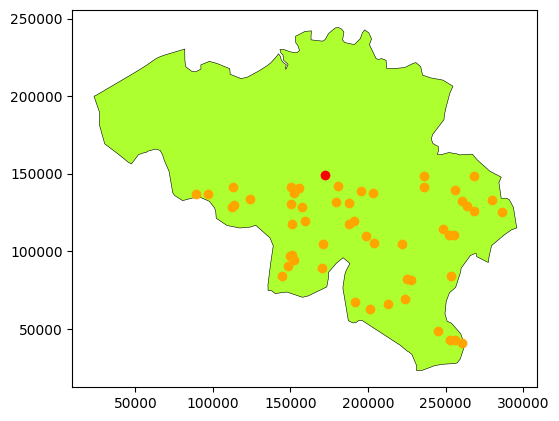

In [23]:
#Ploteamos nuestro país de fondo y mostramos los distritos abajo de mi centroide
base=belgica.plot(facecolor="greenyellow", edgecolor="black",linewidth=0.4,figsize=(6,6))
centroid_belgica_3447.plot(ax=base, color="red") #ubicamos el centroide
aeropuertosBelgica_clipped.cx[:,:149000.643].plot(ax=base, #ubicamos los aereopuertos por debajo de mi centroide
                  color="orange")

# b) Traza tu país como fondo. Seleccione con cx todas las primeras divisiones administrativas encima del centroide. Luego, usa el clip para mostrar los ríos que cruzan esas divisiones.

In [24]:
bel_distritos=gpd.read_file("https://github.com/betsfv/introgeodf/raw/refs/heads/main/data/gadm41_BEL_shp/gadm41_BEL_2.shp")
bel_estados=gpd.read_file("https://github.com/betsfv/introgeodf/raw/refs/heads/main/data/gadm41_BEL_shp/gadm41_BEL_1.shp")
bel_municipalidades=gpd.read_file("https://github.com/betsfv/introgeodf/raw/refs/heads/main/data/gadm41_BEL_shp/gadm41_BEL_4.shp")

In [25]:
bel_municipalidades_3447=bel_municipalidades.to_crs(3447)
bel_distritos_3447=bel_distritos.to_crs(3447)
bel_estados_3447=bel_estados.to_crs(3447)

In [26]:
distritosBelgica_clipped=gpd.clip(bel_distritos_3447, belgica)

<Axes: >

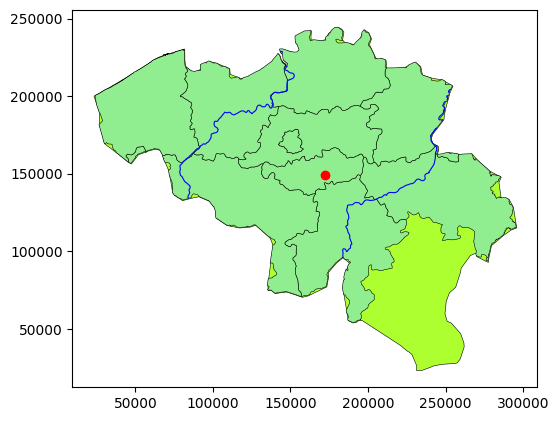

In [27]:
base=belgica.plot(facecolor="greenyellow", edgecolor="black",linewidth=0.4,figsize=(6,6)) #Ploteamos nuestro país de fondo
distritosBelgica_clipped.cx[:,149000.643:].plot(ax=base, #mostramos los distritos que se encuentran del centroide para arriba
              edgecolor="black",
              color='lightgreen',
              linewidth=0.4)
rios_Distritos_above_centroid_clipped=gpd.clip(riosBelgica_clipped, distritosBelgica_clipped.cx[:,149000.643:]) #usamos clipped para intersectar a los distritos que se encuentran del centroide para arriba con los rios
rios_Distritos_above_centroid_clipped.cx[:,149000.643:].plot(ax=base, #mostramos estos ríos
          edgecolor="blue",
          linewidth=0.8)
centroid_belgica_3447.plot(ax=base, color="red") #ubicamos el centroide


# Ejercicio 2:

## a) Cree algún subconjunto de polígonos con los datos de su país a nivel municipal (o similar). Utilice UNION unaria con esos polígonos y cree un geoDF con el resultado.

In [28]:
# higher level count
len(set(bel_municipalidades_3447.NAME_2))

11

<Axes: >

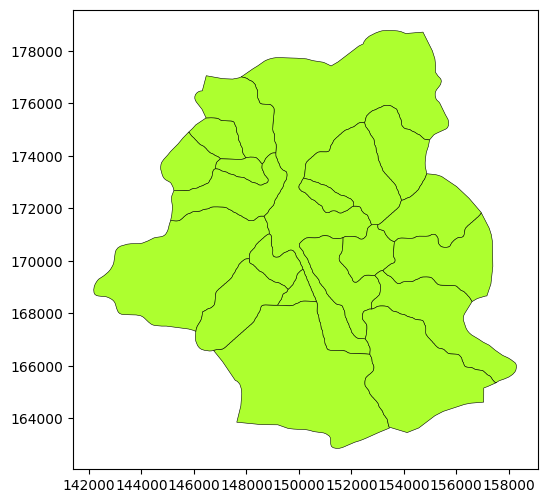

In [29]:
bel_municipalidades_3447[bel_municipalidades_3447.NAME_3=='Brussel'].plot(facecolor="greenyellow", edgecolor="black",linewidth=0.4,figsize=(6,6))

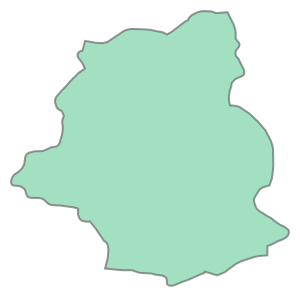

In [30]:
bel_municipalidades_3447[bel_municipalidades_3447.NAME_3=='Brussel'].union_all()

In [31]:
bruselasUnion=bel_municipalidades_3447[bel_municipalidades_3447.NAME_3=='Brussel'].union_all()

In [32]:
type(bruselasUnion)

shapely.geometry.polygon.Polygon

In [33]:
gpd.GeoDataFrame(index=[0],data={'ADM':'Brussel'},geometry=[bruselasUnion],crs=bel_municipalidades_3447.crs)

,ADM,geometry
0,Brussel,"POLYGON ((153452.895 163619.121, 153064.11 163..."


# b) Disolver sus municipios por otro nivel administrativo superior. Traza el resultado.

<Axes: >

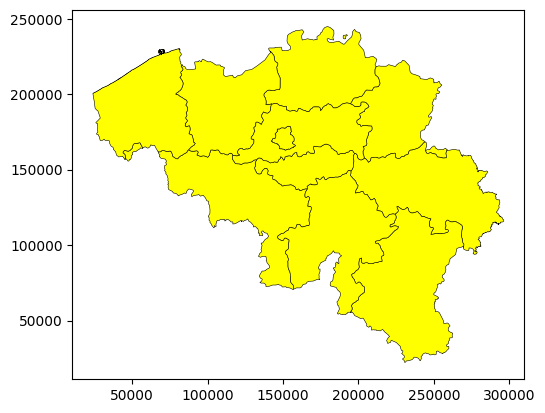

In [34]:
bel_municipalidades_3447.dissolve(by='NAME_2').plot(facecolor='yellow', edgecolor='black',linewidth=0.4)

In [35]:
belgica_muni_diss= bel_municipalidades_3447.dissolve(by='NAME_2')

# Ejercicio 3

## a) Seleccionamos algunos puntos de nuestro mapa

In [36]:
#Guardamos las coordenadas de los centroides en variables
centroid_x=centroid_belgica_3447.x
centroid_y=centroid_belgica_3447.y

In [37]:
#Abrimos la info de aereopuesrtos
aeropuertosBelgica_clipped

,name,kind,latitude_deg,longitude_deg,elevation_ft,municipality,geometry
43,Arlon-Sterpenich Ultralight Airfield,small_airport,49.661981,5.885953,1138.0,Arlon,POINT (260550.629 41057.508)
23,Arlon Hospital Heliport,heliport,49.677290,5.819960,1301.0,Arlon,POINT (255753.403 42664.104)
28,Camp Général Bastin Heliport,heliport,49.681400,5.778540,1270.0,Arlon,POINT (252755.654 43063.186)
30,Pont d'Oye Heliport,heliport,49.734470,5.672000,1262.0,Habay,POINT (244963.512 48823.602)
27,Ardenne Hospital Heliport,closed,49.924890,5.379360,1647.0,Libramont-Chevigny,POINT (223578.325 69669.832)
...,...,...,...,...,...,...,...
149,Oostende-Brugge International Airport,medium_airport,51.199800,2.874673,13.0,Oostende,POINT (46570.946 212018.149)
161,Sint-Jan General Hospital Heliport,heliport,51.220486,3.196068,20.0,Brugge,POINT (69067.71 213918.755)
194,Zuienkerke Sport Aviation Airfield,small_airport,51.255550,3.139858,16.0,Zuienkerke,POINT (65205.15 217882.26)
107,Westkapelle Heliport,heliport,51.321655,3.294568,10.0,Knokke-Heist,POINT (76110.045 225070.026)


In [38]:
#Ahora, solo escogemos los aereopuertos cerrados y los separamos
Bel_Airports_ArribaIzq=aeropuertosBelgica_clipped[aeropuertosBelgica_clipped.kind=="closed"].cx[:centroid_x,centroid_y:]
Bel_Airports_ArribaDer=aeropuertosBelgica_clipped[aeropuertosBelgica_clipped.kind=="closed"].cx[centroid_x:,centroid_y:]
Bel_Airports_AbajoDer=aeropuertosBelgica_clipped[aeropuertosBelgica_clipped.kind=="closed"].cx[centroid_x:,:centroid_y]
Bel_Airports_AbajoIzq=aeropuertosBelgica_clipped[aeropuertosBelgica_clipped.kind=="closed"].cx[:centroid_x,:centroid_y]

/usr/local/lib/python3.10/dist-packages/shapely/geometry/polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
/usr/local/lib/python3.10/dist-packages/shapely/geometry/polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
/usr/local/lib/python3.10/dist-packages/shapely/geometry/polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
/usr/local/lib/python3.10/dist-packages/shapely/geometry/polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


<Axes: >

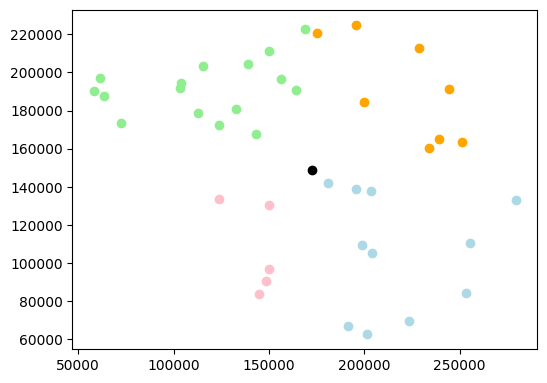

In [39]:
#Ahora los ploteamos los subconjuntos
base=Bel_Airports_ArribaIzq.plot(facecolor="lightgreen",figsize=(6,6))
Bel_Airports_ArribaDer.plot(ax=base, facecolor="orange")
Bel_Airports_AbajoDer.plot(ax=base, facecolor="lightblue")
Bel_Airports_AbajoIzq.plot(ax=base, facecolor="pink")
centroid_belgica_3447.plot(ax=base, color="black")

# b) Creamos un covex hull con estos puntos

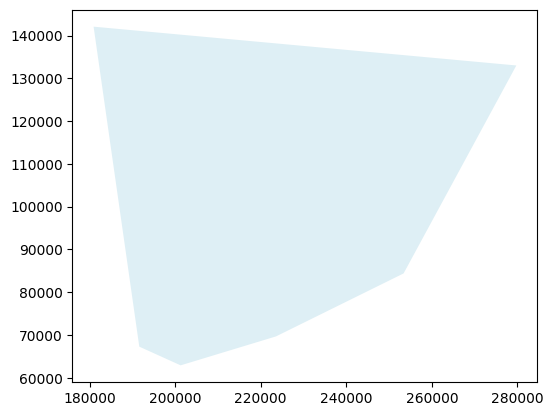

In [40]:
#Luego, usamos dissolve para unir los puntos del subconjunto de aereopuertos cerrados que se encuentras cerrados
#y a la derecha del centroide creando una figura con angulos convexos
Closed_BelAirports_AbajoDer_hull = Bel_Airports_AbajoDer.dissolve().convex_hull.plot(color="lightblue",alpha=0.4,figsize=(6,6))

#c) Convertimos este hull en una GDF

In [41]:
closed_BelAirports_AbajoDer = gpd.GeoDataFrame(index=[0],geometry=(Bel_Airports_AbajoDer.dissolve().convex_hull))
closed_BelAirports_AbajoDer["name"] = "Closed Airports"
closed_BelAirports_AbajoDer

,geometry,name
0,"POLYGON ((201288.703 62904.511, 191625.861 672...",Closed Airports


# d) Plotea el hull sobre el mapa del país

<Axes: >

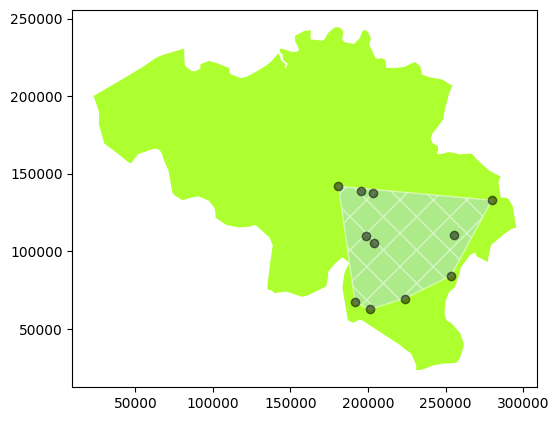

In [42]:
base3=belgica.plot(facecolor="greenyellow",figsize=(6,6))
closed_BelAirports_AbajoDer.plot(ax=base3,facecolor="lightblue",alpha=0.5,
                                 edgecolor="white",
                                 hatch="X")
Bel_Airports_AbajoDer.plot(ax=base3,facecolor="black",alpha=0.5)

# EJERCICIO 4

## a) Aplique dos superposiciones espaciales a sus mapas.

In [43]:
# el norte
MuniN_bel=bel_municipalidades_3447.cx[:,centroid_y:]
# el sur
MuniS_bel=bel_municipalidades_3447.cx[:,:centroid_y]
# el este
MuniE_bel=bel_municipalidades_3447.cx[centroid_x:,:]
# el oeste
MuniO_bel=bel_municipalidades_3447.cx[:centroid_x,:]

/usr/local/lib/python3.10/dist-packages/shapely/geometry/polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
/usr/local/lib/python3.10/dist-packages/shapely/geometry/polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
/usr/local/lib/python3.10/dist-packages/shapely/geometry/polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
/usr/local/lib/python3.10/dist-packages/shapely/geometry/polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


Cuando lo ploteamos, notamos que tienen ciertas intersecciones

<Axes: >

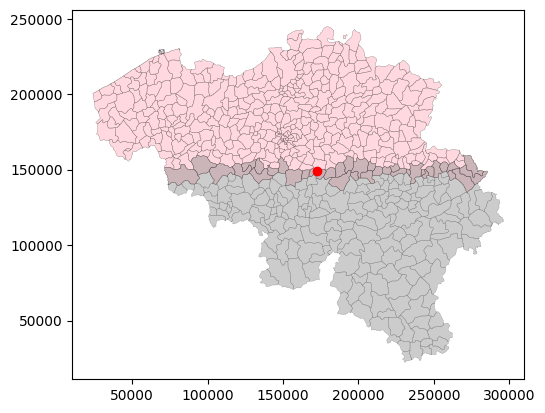

In [44]:
base4=MuniN_bel.plot(facecolor="pink",edgecolor="black",linewidth=0.2, alpha=0.6)
MuniS_bel.plot(ax=base4,facecolor="grey",edgecolor="black",linewidth=0.2, alpha=0.4)
centroid_belgica_3447.plot(ax=base4, color="red")

<Axes: >

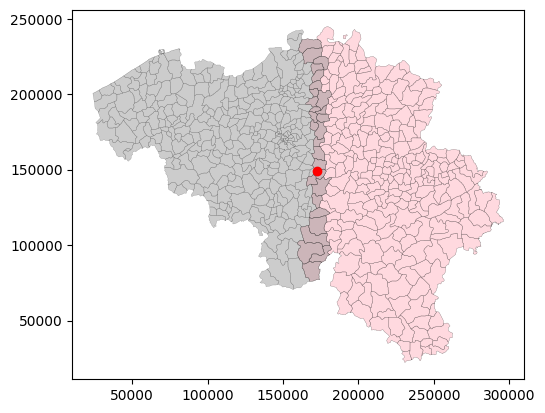

In [45]:
base5=MuniE_bel.plot(facecolor="pink",edgecolor="black",linewidth=0.2, alpha=0.6)
MuniO_bel.plot(ax=base5,facecolor="grey",edgecolor="black",linewidth=0.2, alpha=0.4)
centroid_belgica_3447.plot(ax=base5, color="red")

<Axes: >

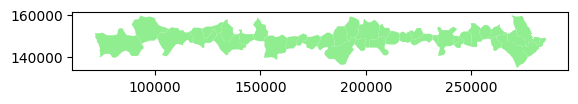

In [46]:
#guardamos las intersecciones
MuniNS=MuniN_bel.overlay(MuniS_bel,how="intersection",keep_geom_type=True)
MuniNS.plot(color="lightgreen")

<Axes: >

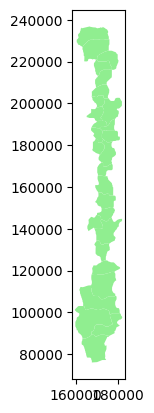

In [47]:
MuniEO=MuniE_bel.overlay(MuniO_bel,how="intersection",keep_geom_type=True)
MuniEO.plot(color="lightgreen")

In [48]:
MuniMidBel=MuniNS.dissolve().overlay(MuniEO.dissolve(),how="union",keep_geom_type=True)
MuniMidBel

,GID_4_1_1,GID_0_1_1,COUNTRY_1_1,GID_1_1_1,NAME_1_1_1,GID_2_1_1,NAME_2_1_1,GID_3_1_1,NAME_3_1_1,NAME_4_1_1,...,GID_2_2_2,NAME_2_2_2,GID_3_2_2,NAME_3_2_2,NAME_4_2_2,VARNAME_4_2_2,TYPE_4_2_2,ENGTYPE_4_2_2,CC_4_2_2,geometry
0,BEL.3.1.1.2_1,BEL,Belgium,BEL.3_1,Wallonie,BEL.3.1_1,Brabant Wallon,BEL.3.1.1_1,Nivelles,Braine-l'Alleud,...,BEL.2.1_1,Antwerpen,BEL.2.1.1_1,Antwerpen,Brecht,NA,Gemeente,Commune,NA,"POLYGON ((176377.882 145047.035, 176085.899 14..."
1,BEL.3.1.1.2_1,BEL,Belgium,BEL.3_1,Wallonie,BEL.3.1_1,Brabant Wallon,BEL.3.1.1_1,Nivelles,Braine-l'Alleud,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((197739.907 155397.963, 198007...."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BEL.2.1_1,Antwerpen,BEL.2.1.1_1,Antwerpen,Brecht,NA,Gemeente,Commune,NA,"MULTIPOLYGON (((167278.469 77290.66, 167244.06..."


<Axes: >

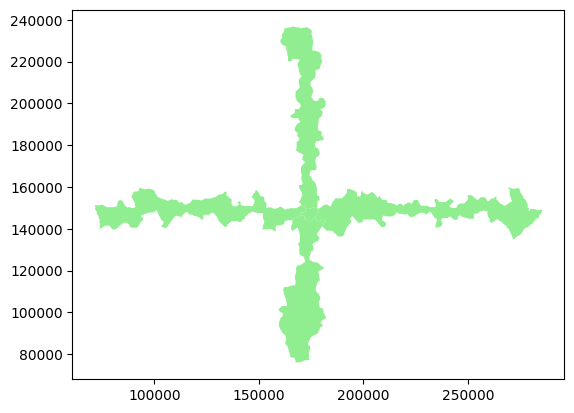

In [49]:
MuniMidBel.plot(color="lightgreen")

<Axes: >

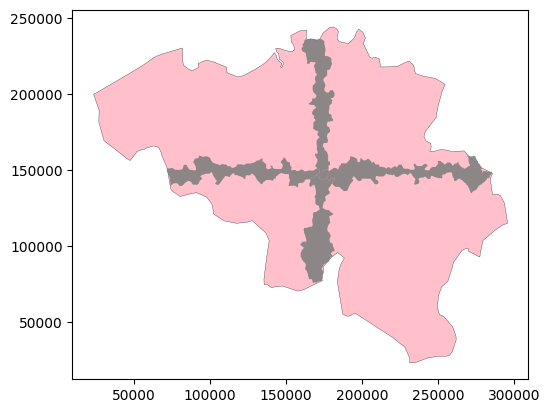

In [50]:
base7=belgica.plot(facecolor="pink",edgecolor="black",linewidth=0.2, alpha=1)
MuniMidBel.plot(ax=base7,color="grey",alpha=0.9)